In [48]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv("World_Development_Dataset.csv")
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.042,32.4%,5102150.3,Botswana,6.0,66.0,409969.8,"$22,568,793,525",0.074,"$1,632",...,42.9,1.4,1,0.275,0.697,0.041,1519155,0.867,"$8,577,000,000","$704,000,000"
1,0.025,63.5%,2091377.5,Syrian Arab Republic,37.0,184.0,1200867.8,"$183,477,522,124",0.037,"$4,914",...,77.6,1.7,1,0.440,0.844,0.032,7012977,0.163,"$37,166,000,000","$404,000,000"
2,0.035,66.0%,3700837.2,Ecuador,44.0,77.0,2406610.8,"$5,494,252,208",0.221,"$7,180",...,58.5,2.3,1,0.317,0.743,0.121,5373054,0.597,"$3,000,000","$3,946,000,000"
3,0.012,44.6%,3242594.3,French Polynesia,110.0,175.0,511453.7,"$225,426,789,027",0.206,$128,...,83.8,0.3,1,0.412,0.621,0.185,1230985,0.946,"$1,623,000,000","$8,382,000,000"
4,0.012,55.4%,6350202.9,Cote d'Ivoire,72.0,18.0,1273730.2,"$526,425,740",0.115,"$3,624",...,82.9,0.5,1,0.261,0.642,0.090,6183484,0.961,"$676,000,000","$12,213,000,000"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Birth Rate              100993 non-null  float64
 1   Business Tax Rate       100993 non-null  object 
 2   CO2 Emissions           100993 non-null  float64
 3   Country                 100993 non-null  object 
 4   Days to Start Business  100993 non-null  float64
 5   Ease of Business        100993 non-null  float64
 6   Energy Usage            100993 non-null  float64
 7   GDP                     100993 non-null  object 
 8   Health Exp % GDP        100993 non-null  float64
 9   Health Exp/Capita       100993 non-null  object 
 10  Life Expectancy Female  100993 non-null  float64
 11  Life Expectancy Male    100993 non-null  float64
 12  Mobile Phone Usage      100993 non-null  float64
 13  Number of Records       100993 non-null  int64  
 14  Population 0-14     

In [9]:
df.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [11]:
df[df.duplicated()]

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound


In [13]:
df["Number of Records"].value_counts()

Number of Records
1    100993
Name: count, dtype: int64

In [17]:
# Drop unimportant columns

columns_to_drop = ['Country', 'Number of Records']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Birth Rate              100993 non-null  float64
 1   Business Tax Rate       100993 non-null  object 
 2   CO2 Emissions           100993 non-null  float64
 3   Days to Start Business  100993 non-null  float64
 4   Ease of Business        100993 non-null  float64
 5   Energy Usage            100993 non-null  float64
 6   GDP                     100993 non-null  object 
 7   Health Exp % GDP        100993 non-null  float64
 8   Health Exp/Capita       100993 non-null  object 
 9   Life Expectancy Female  100993 non-null  float64
 10  Life Expectancy Male    100993 non-null  float64
 11  Mobile Phone Usage      100993 non-null  float64
 12  Population 0-14         100993 non-null  float64
 13  Population 15-64        100993 non-null  float64
 14  Population 65+      

In [19]:
# Remove the symbols $,% etc from the column values

def clean_money(x):
    return pd.to_numeric(x.replace('$', '').replace(',', ''), errors='coerce')

def clean_percent(x):
    return pd.to_numeric(x.replace('%', ''), errors='coerce')

# Clean individual columns
df['Business Tax Rate'] = df['Business Tax Rate'].apply(clean_percent)
df['GDP'] = df['GDP'].apply(clean_money)
df['Health Exp/Capita'] = df['Health Exp/Capita'].apply(clean_money)
df['Tourism Inbound'] = df['Tourism Inbound'].apply(clean_money)
df['Tourism Outbound'] = df['Tourism Outbound'].apply(clean_money)
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.042,32.4,5102150.3,6.0,66.0,409969.8,22568793525,0.074,1632,63.1,42.9,1.4,0.275,0.697,0.041,1519155,0.867,8577000000,704000000
1,0.025,63.5,2091377.5,37.0,184.0,1200867.8,183477522124,0.037,4914,40.4,77.6,1.7,0.440,0.844,0.032,7012977,0.163,37166000000,404000000
2,0.035,66.0,3700837.2,44.0,77.0,2406610.8,5494252208,0.221,7180,84.1,58.5,2.3,0.317,0.743,0.121,5373054,0.597,3000000,3946000000
3,0.012,44.6,3242594.3,110.0,175.0,511453.7,225426789027,0.206,128,50.7,83.8,0.3,0.412,0.621,0.185,1230985,0.946,1623000000,8382000000
4,0.012,55.4,6350202.9,72.0,18.0,1273730.2,526425740,0.115,3624,81.5,82.9,0.5,0.261,0.642,0.090,6183484,0.961,676000000,12213000000


In [21]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the entire dataframe
df_scaled = scaler.fit_transform(df)

# Optional: convert back to DataFrame for readability
import numpy as np
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.901607,-0.469860,0.398456,-0.947258,-0.526888,-1.203419,-0.213886,-0.681328,0.024269,0.037654,-1.333417,0.164208,-0.305112,0.284304,-1.188670,-0.239805,1.228202,0.114221,-0.402506
1,-0.378233,0.246614,-0.858905,-0.542848,1.633986,-0.202322,-0.073992,-1.272094,1.757714,-1.506161,1.022941,0.545714,1.190271,1.608221,-1.318078,-0.195612,-1.426864,1.942008,-0.421204
2,0.374614,0.304208,-0.186761,-0.451530,-0.325451,1.323875,-0.228731,1.665768,2.954541,1.465853,-0.274075,1.308724,0.075531,0.698591,-0.038377,-0.208804,0.209924,-0.433942,-0.200443
3,-1.356935,-0.188800,-0.378133,0.409471,1.469173,-1.074963,-0.037521,1.426269,-0.770095,-0.805663,1.443961,-1.234644,0.936509,-0.400169,0.881857,-0.242123,1.526143,-0.330371,0.076038
4,-1.356935,0.060008,0.919668,-0.086257,-1.405888,-0.110094,-0.233050,-0.026696,1.076378,1.289028,1.382845,-0.980307,-0.431993,-0.211039,-0.484116,-0.202285,1.582714,-0.390915,0.314811


#### KMeans Clustering

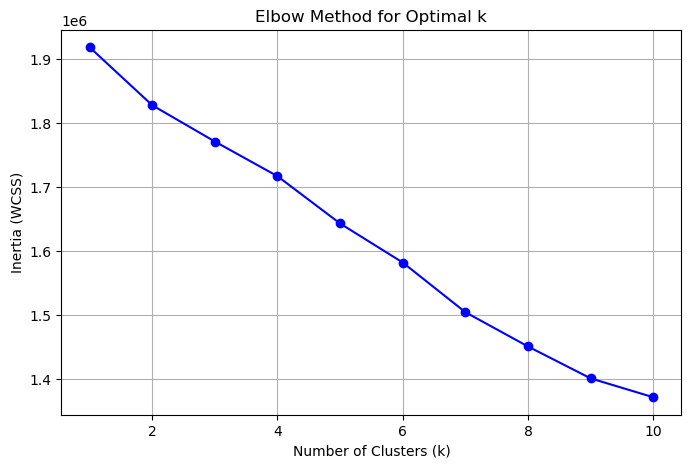

In [24]:
# Elbow plot to identify otimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k (clusters)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


#### Observations
- The elbow plot looks like a straight line without a clear bend.
- The data may not naturally form well-separated clusters, at least not in the KMeans sense (which assumes spherical, equally sized clusters).
- KMeans isn't the best fit — DBSCAN or Hierarchical might work

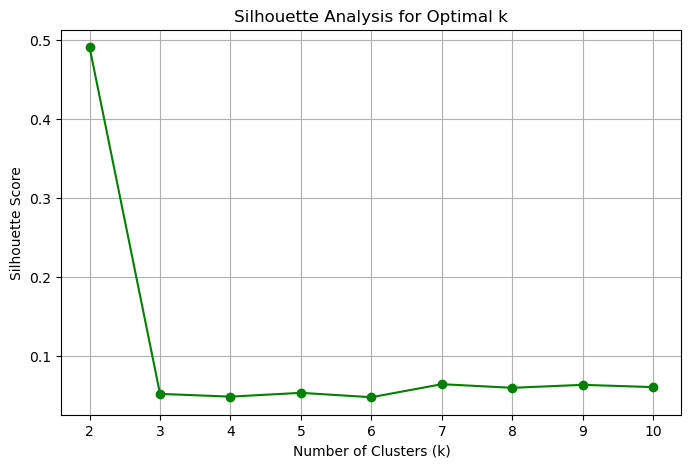

In [28]:
# Let us try with Silhoutte score
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()


In [40]:
# Final KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans_labels


In [42]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster
0,0.042,32.4,5102150.3,6.0,66.0,409969.8,22568793525,0.074,1632,63.1,42.9,1.4,0.275,0.697,0.041,1519155,0.867,8577000000,704000000,2
1,0.025,63.5,2091377.5,37.0,184.0,1200867.8,183477522124,0.037,4914,40.4,77.6,1.7,0.440,0.844,0.032,7012977,0.163,37166000000,404000000,1
2,0.035,66.0,3700837.2,44.0,77.0,2406610.8,5494252208,0.221,7180,84.1,58.5,2.3,0.317,0.743,0.121,5373054,0.597,3000000,3946000000,1
3,0.012,44.6,3242594.3,110.0,175.0,511453.7,225426789027,0.206,128,50.7,83.8,0.3,0.412,0.621,0.185,1230985,0.946,1623000000,8382000000,1
4,0.012,55.4,6350202.9,72.0,18.0,1273730.2,526425740,0.115,3624,81.5,82.9,0.5,0.261,0.642,0.090,6183484,0.961,676000000,12213000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100988,0.018,66.3,6342826.0,60.0,47.0,1093798.9,18262773766,0.057,681,84.9,77.1,0.8,0.209,0.570,0.125,12238791,0.770,2340000000,40500000,2
100989,0.045,65.6,5277509.2,192.0,29.0,1634567.8,1537753885,0.097,622,59.8,65.8,1.9,0.303,0.702,0.032,1577984,0.805,51000000,10689000000,2
100990,0.043,38.7,7296390.0,115.0,107.0,2315448.4,25978563316,0.186,92,38.4,40.9,2.1,0.345,0.492,0.186,6689700,0.626,109000000,22787000000,2
100991,0.047,25.3,4842121.8,89.0,137.0,703589.0,161207304960,0.151,3624,43.7,82.6,2.1,0.431,0.606,0.033,32126351,0.624,639000000,804000000,2


In [44]:
df["Cluster"].value_counts()

Cluster
2    49168
1    48890
0     2935
Name: count, dtype: int64

In [46]:
# Cluster-wise mean of original features
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
Cluster                                                                         
0          0.030025         266.944463   4.125837e+06               77.640204   
1          0.030024          46.308885   2.068435e+06               79.542974   
2          0.030024          46.461627   6.217214e+06               77.744346   

         Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
Cluster                                                                   
0               93.486542  1.369578e+06  2.592369e+11          0.115665   
1               94.649478  1.362145e+06  2.680357e+11          0.116985   
2               94.970713  1.358750e+06  2.696872e+11          0.116421   

         Health Exp/Capita  Life Expectancy Female  Life Expectancy Male  \
Cluster                                                                    
0              1570.520954               62.370426             62.

#### Observations
- Try DBSCAN
- Try Hierarchical clustering